#  Apple Appstore Mood Tracker Apps Analysis

The reviews consist the time period between 1.01.2020 - 25.01.2023 and are collected using appbot.co



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

import glob

In [3]:
files = glob.glob("data/appbot/*.csv")

In [4]:
for name in files:
    print(name)

data/appbot\review_export_google_report_p1.csv
data/appbot\review_export_google_report_p2.csv
data/appbot\review_export_google_report_p3.csv
data/appbot\review_export_google_report_p4.csv
data/appbot\review_export_google_report_p5.csv
data/appbot\review_export_google_report_p6.csv
data/appbot\review_export_google_report_p7.csv
data/appbot\review_export_google_report_p8.csv
data/appbot\review_export_part2_2020_2023.csv
data/appbot\review_export_part3_2020_2023.csv
data/appbot\review_export_part4_2020_2023.csv
data/appbot\review_export_part_1_2020_2023.csv
data/appbot\review_export_report(3).csv
data/appbot\review_export_report(4).csv


In [5]:
li = []

for filename in files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

remove duplicates

In [6]:
frame = frame.drop_duplicates()

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136306 entries, 0 to 173948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   App Name            74964 non-null   object 
 1   App Store           74964 non-null   object 
 2   App                 136306 non-null  object 
 3   Store               136306 non-null  object 
 4   App ID              136306 non-null  object 
 5   Review ID           136306 non-null  object 
 6   Country             136306 non-null  object 
 7   Version             61140 non-null   object 
 8   Rating              136306 non-null  int64  
 9   Date                136306 non-null  object 
 10  Author              136305 non-null  object 
 11  Subject             61140 non-null   object 
 12  Body                136304 non-null  object 
 13  Translated Subject  2184 non-null    object 
 14  Translated Body     5264 non-null    object 
 15  Sentiment           136306 non-nul

check if all apps are included

In [8]:
frame["App"].unique()

array(['#SelfLove (GG Confidence & Sel', 'Alan Mind: Self-Care Journal',
       'CBT Companion: Therapy app', 'DailyBean: Simplest Journal',
       'DBT Coach : Guided Therapy', 'Feelyou: Social mood tracker',
       'HeadHelp: Self Care & Vent', 'MindDoc: Your Companion',
       'Mindshine: Mental Health Coach', 'Moodflow: Mood Tracker',
       'Mooditude: Mental Health App', 'Moodpress - Mood Diary Tracker',
       'MoodTools - Depression Aid', 'Moodtrack Social Diary',
       'Pixels - Mood & Mental Health', 'Reflectly: Mood Tracker Diary',
       'Sanvello: Anxiety & Depression', 'Symptom & Mood Tracker',
       'The Hopeful: Daily Self-Care M', 'Tochi - Mood Tracker, Journal',
       'Ultiself - Habit Tracker', 'Youper: Self-Guided Therapy',
       'Woebot: Your Self-Care Expert', 'Daylio Journal - Mood Tracker',
       'Beautiful Mood - Mood Tracker', 'Moodflow',
       'Mooditude —\xa0A Happier You!', 'Pixels: Mental Health and Mood',
       'The Hopeful | Daily Self-Care', 'Ult

In [9]:
frame[frame["App Name"].isnull()]

,App Name,App Store,App,Store,App ID,Review ID,Country,Version,Rating,Date,...,Translated Subject,Translated Body,Sentiment,Device,Language,OS Version,Reply URL,Topics,Custom Topics,Tags
63856,NaN,NaN,Daylio Journal - Mood Tracker,Google Play,net.daylio,18c46558-1483-4c33-97b7-a46acc3f8fa7,English,NaN,5,2023-01-25,...,NaN,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1258856-daylio-jour...,[],[],[]
63857,NaN,NaN,Daylio Journal - Mood Tracker,Google Play,net.daylio,d4600115-4208-447d-ad55-0b26aeafd5d6,English,NaN,5,2023-01-25,...,NaN,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1258856-daylio-jour...,"[""Audio"", ""Complexity"", ""Design & UX"", ""Satisf...",[],[]
63858,NaN,NaN,Daylio Journal - Mood Tracker,Google Play,net.daylio,9c56a252-809f-488c-bff0-9d87a0226e0a,Russian,NaN,5,2023-01-25,...,NaN,I have been using it for two years in a row an...,positive,NaN,Russian,NaN,https://app.appbot.co/apps/1258856-daylio-jour...,"[""Complexity"", ""Frequency"", ""Use cases""]",[],[]
63859,NaN,NaN,Daylio Journal - Mood Tracker,Google Play,net.daylio,6a771728-724d-407b-b9fb-4c58270d7a51,English,NaN,5,2023-01-25,...,NaN,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1258856-daylio-jour...,"[""Satisfied users"", ""Use cases""]",[],[]
63860,NaN,NaN,Daylio Journal - Mood Tracker,Google Play,net.daylio,cc34fcbe-4f13-49e0-98ee-2d589077cd34,English,NaN,5,2023-01-25,...,NaN,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1258856-daylio-jour...,"[""Frequency"", ""Satisfied users"", ""Use cases""]",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173944,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6602458379,United Kingdom,3.12.0,5,2020-11-02,...,NaN,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,"[""Satisfied users""]",[],[]
173945,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6602277508,United Kingdom,3.12.0,5,2020-11-02,...,NaN,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,"[""Satisfied users""]",[],[]
173946,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6602203438,United Kingdom,3.12.0,3,2020-11-02,...,NaN,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,"[""Customer Support""]",[],[]
173947,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6602218682,Greece,3.12.0,5,2020-11-02,...,NaN,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,"[""Pricing"", ""Satisfied users""]",[],[]


In [10]:
app_names = [
    "Daylio",
    "Alan Mind",
    "CBT Companion",
    "DailyBean",
    "DBT Coach",
    "Feelyou",
    "HeadHelp",
    "MindDoc",
    "Mindshine",
    "Moodflow",
    "Mooditude",
    "Moodpress",
    "Moodtools",
    "Moodtrack",
    "Pixels",
    "The Hopeful",
    "Ultiself",
    "Reflectly",
    "#SelfLove",
    "Beautiful Mood",
    "EMMO",
    "Youper"





]

In [11]:


frame["AppNameShort"] = frame["App"]


for app_name in app_names:
    frame["AppNameShort"].replace(f'.*{app_name}.*',app_name,regex=True, inplace = True)

In [12]:
frame["AppNameShort"].unique()

array(['#SelfLove', 'Alan Mind', 'CBT Companion', 'DailyBean',
       'DBT Coach', 'Feelyou', 'HeadHelp', 'MindDoc', 'Mindshine',
       'Moodflow', 'Mooditude', 'Moodpress', 'MoodTools - Depression Aid',
       'Moodtrack', 'Pixels', 'Reflectly',
       'Sanvello: Anxiety & Depression', 'Symptom & Mood Tracker',
       'The Hopeful', 'Tochi - Mood Tracker, Journal', 'Ultiself',
       'Youper', 'Woebot: Your Self-Care Expert', 'Daylio',
       'Beautiful Mood', 'EMMO'], dtype=object)

In [13]:
frame = frame.drop(frame[frame["AppNameShort"]=='EMMO'].index)

## convert date to datetime object

In [14]:
frame["Date"] = pd.to_datetime(frame["Date"])

In [15]:
frame.describe()

,Rating,Device,OS Version
count,129886.000000,0.0,0.0
mean,4.423009,NaN,NaN
std,1.148321,NaN,NaN
min,1.000000,NaN,NaN
25%,4.000000,NaN,NaN
50%,5.000000,NaN,NaN
75%,5.000000,NaN,NaN
max,5.000000,NaN,NaN


## check for most rated in last time

<AxesSubplot: xlabel='AppNameShort'>

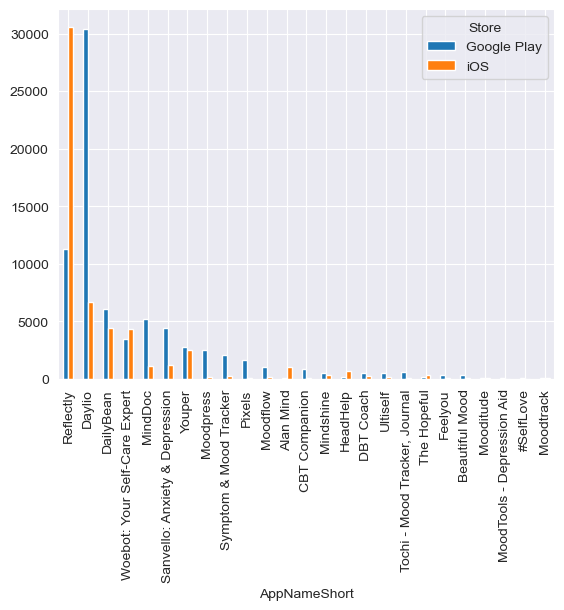

In [16]:

counted = frame[["AppNameShort", "Store"]].groupby(["Store"]).AppNameShort.value_counts().unstack()

counted = counted.transpose()
counted["total"] = counted["Google Play"] + counted["iOS"]

counted.sort_values(by="total", ascending=False)[["Google Play", "iOS"]].plot.bar()



In [17]:
most_rated = frame.groupby(["AppNameShort"])["AppNameShort"].count().reset_index(
  name='Count').sort_values(["Count"], ascending=False)[:5]

In [18]:
most_rated

,AppNameShort,Count
17,Reflectly,41867
6,Daylio,37115
5,DailyBean,10459
23,Woebot: Your Self-Care Expert,7780
9,MindDoc,6326


<AxesSubplot: xlabel='Date'>

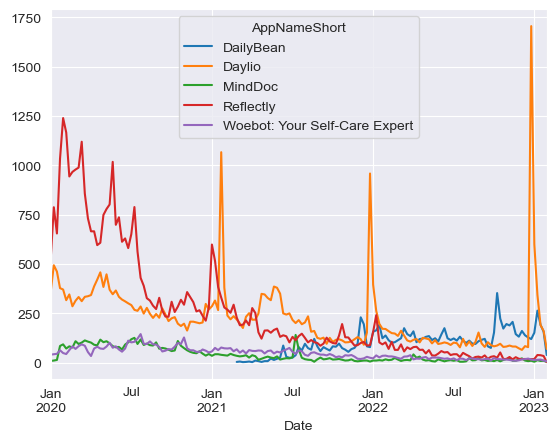

In [19]:
frame[frame["AppNameShort"].isin(most_rated["AppNameShort"])].groupby([pd.Grouper(key="Date", freq="1W"),"AppNameShort"])["AppNameShort"].count().unstack().plot(kind="line")

<AxesSubplot: xlabel='Date'>

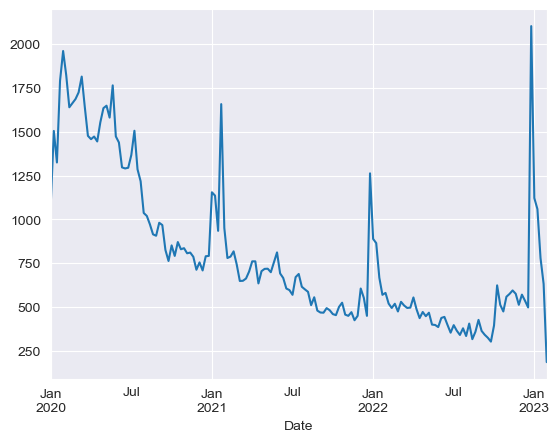

In [20]:
frame.groupby([pd.Grouper(key="Date", freq="1W")])["AppNameShort"].count().plot(kind="line")

check if the peaks on january can also be reproduced with normalized values

In [21]:
reviews_per_month = frame.groupby([pd.Grouper(key="Date", freq="1W"), "App"])["App"].count().unstack(fill_value=0)

In [22]:
df_z_scaled = reviews_per_month.copy()

# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()



In [23]:
reviews_per_month.transpose()

Date,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2022-11-27,2022-12-04,2022-12-11,2022-12-18,2022-12-25,2023-01-01,2023-01-08,2023-01-15,2023-01-22,2023-01-29
App,,,,,,,,,,,,,,,,,,,,,
#SelfLove,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
#SelfLove (GG Confidence & Sel,0,0,0,1,2,1,2,3,1,0,...,0,1,0,0,0,0,0,0,0,0
Alan Mind Daily Journal,5,14,12,10,1,8,6,11,6,6,...,0,1,2,2,0,0,0,1,2,1
Alan Mind: Self-Care Journal,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
Beautiful Mood,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,2,0
Beautiful Mood - Mood Tracker,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,2,0,0,0
CBT Companion: Therapy App,0,0,1,0,0,0,0,0,0,0,...,0,0,0,3,0,3,1,1,2,0
CBT Companion: Therapy app,0,0,0,0,0,1,1,0,1,0,...,4,2,1,2,3,2,3,6,2,0
DBT Coach,2,2,1,0,0,0,1,3,0,1,...,1,2,2,5,1,0,3,1,1,2


## Assumption:
Based on the increased number of reviews at the beginning of the year, it could be assumed that people promise themselves New Year's resolutions with the applications.



In [24]:
from joypy import joyplot
frame[["App", "Rating"]]

,App,Rating
0,#SelfLove (GG Confidence & Sel,4
1,#SelfLove (GG Confidence & Sel,1
2,#SelfLove (GG Confidence & Sel,5
3,#SelfLove (GG Confidence & Sel,1
4,#SelfLove (GG Confidence & Sel,5
...,...,...
173944,Reflectly - Journal & AI Diary,5
173945,Reflectly - Journal & AI Diary,5
173946,Reflectly - Journal & AI Diary,3
173947,Reflectly - Journal & AI Diary,5


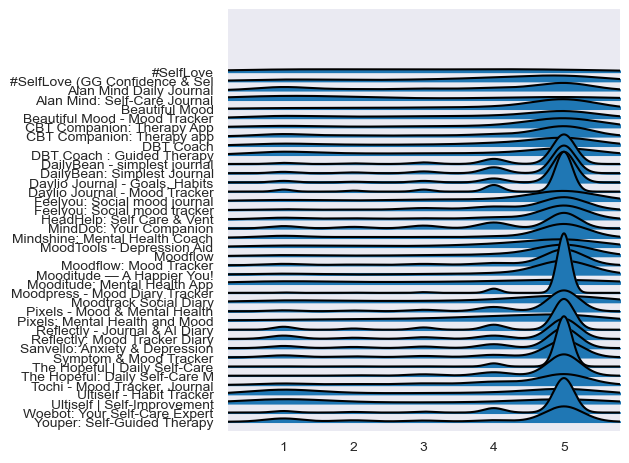

In [25]:
ax, fig = joyplot(
    data= frame[["App", "Rating"]],
    by='App'
)

In [26]:
ratings = frame[["AppNameShort", "Rating", "Date"]]


In [27]:
sns.set(style="darkgrid")

# Find the order
my_order = ratings.groupby(by=["AppNameShort"])["AppNameShort"].count().reset_index(name='Count').sort_values(['Count'], ascending=False)

In [28]:
my_order

,AppNameShort,Count
17,Reflectly,41867
6,Daylio,37115
5,DailyBean,10459
23,Woebot: Your Self-Care Expert,7780
9,MindDoc,6326
18,Sanvello: Anxiety & Depression,5615
24,Youper,5267
14,Moodpress,2720
19,Symptom & Mood Tracker,2388
16,Pixels,1685


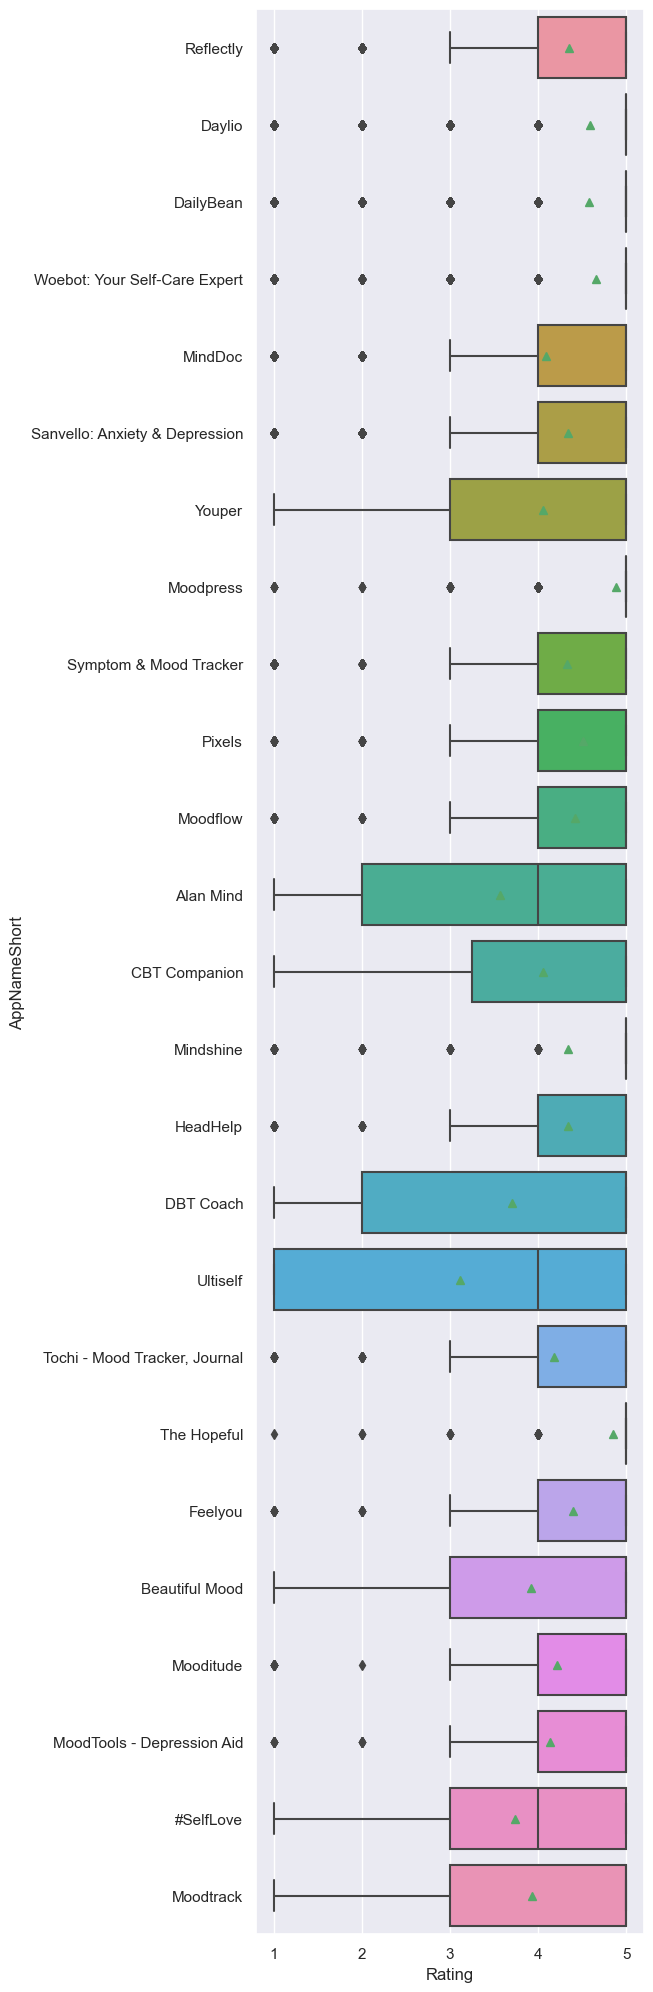

In [29]:
plt.figure(figsize=(5,25))
sns.boxplot(y='AppNameShort', x='Rating', data=ratings, order=my_order["AppNameShort"], showmeans=True)

plt.show()

## exporting the topics to seperated dataframes

In [30]:
import numpy as np
from typing import List


topics = frame["Topics"].values

In [31]:
import sqlalchemy as db
db_engine = "mariadb+pymysql"
address = "127.0.0.1"
port = 3306
username = "root"
password = "itsonlylocal"
database = "mood_tracker"
engine = db.create_engine(f'{db_engine}://{username}:{password}@{address}:{port}/{database}')


In [32]:
frame.to_sql("AppBotData", engine, if_exists="replace")

129886

In [87]:
topics = frame["Topics"].str.replace("[\[\"\" \]]", "", regex=True)
topics = topics.str.split(",")
frame["Topics"] = topics


In [88]:
frame

,App Name,App Store,App,Store,App ID,Review ID,Country,Version,Rating,Date,...,Translated Body,Sentiment,Device,Language,OS Version,Reply URL,Topics,Custom Topics,Tags,AppNameShort
0,#SelfLove (GG Confidence & Sel,Google Play,#SelfLove (GG Confidence & Sel,Google Play,air.com.samuramu.gg.se,feb7d54f-8922-42b7-bce1-94f6a11d9cd3,English,NaN,4,2022-12-03,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1750900-selflove-gg...,[Satisfiedusers],[],[],#SelfLove
1,#SelfLove (GG Confidence & Sel,Google Play,#SelfLove (GG Confidence & Sel,Google Play,air.com.samuramu.gg.se,274f6644-ffa8-4614-9f83-6a1f6ec70bc0,Spanish,NaN,1,2022-10-26,...,NaN,negative,NaN,Spanish,NaN,https://app.appbot.co/apps/1750900-selflove-gg...,[Internationalization],[],[],#SelfLove
2,#SelfLove (GG Confidence & Sel,Google Play,#SelfLove (GG Confidence & Sel,Google Play,air.com.samuramu.gg.se,fdcbfa59-fc60-4a43-86d7-9271c05a8ae7,German,NaN,5,2022-10-07,...,NaN,positive,NaN,German,NaN,https://app.appbot.co/apps/1750900-selflove-gg...,"[Frequency, Satisfiedusers, Usecases]",[],[],#SelfLove
3,#SelfLove (GG Confidence & Sel,Google Play,#SelfLove (GG Confidence & Sel,Google Play,air.com.samuramu.gg.se,14017713-d374-4b4f-8259-ca2c8e98a7c2,English,NaN,1,2022-10-03,...,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/1750900-selflove-gg...,"[Bugs, Design&UX, Performance]",[],[],#SelfLove
4,#SelfLove (GG Confidence & Sel,Google Play,#SelfLove (GG Confidence & Sel,Google Play,air.com.samuramu.gg.se,0a1d89c1-f0bc-400f-a86b-2e7d1e0edef8,Turkish,NaN,5,2022-08-07,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1750900-selflove-gg...,"[Payment, Pricing, CustomerSupport, Usecases]",[],[],#SelfLove
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173944,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6602458379,United Kingdom,3.12.0,5,2020-11-02,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,[Satisfiedusers],[],[],Reflectly
173945,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6602277508,United Kingdom,3.12.0,5,2020-11-02,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,[Satisfiedusers],[],[],Reflectly
173946,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6602203438,United Kingdom,3.12.0,3,2020-11-02,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,[CustomerSupport],[],[],Reflectly
173947,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6602218682,Greece,3.12.0,5,2020-11-02,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,"[Pricing, Satisfiedusers]",[],[],Reflectly


In [104]:
topics = np.concatenate(frame["Topics"].values)
unique_topics = np.unique(topics)[1:]

In [115]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}

    # Loop through all the tags
    for i, item in enumerate(unique_items):

        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)

    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [116]:
topic_matrix = boolean_df(frame["Topics"], unique_topics)

In [117]:
topic_matrix

,Advertising,Audio,Battery,Bugs,Camera&Photos,Complexity,Connectivity,CustomerSupport,Design&UX,Devices,...,Privacy,Satisfiedusers,Security&Accounts,SignUp&Login,Social&Collaboration,Streaming,TouchID,Update,Usecases,Video
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173944,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
173945,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
173946,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
173947,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [118]:
topic_matrix.to_sql("AppBotTopics", engine)

129886

In [119]:
frame[topic_matrix["FeatureRequests"]]

,App Name,App Store,App,Store,App ID,Review ID,Country,Version,Rating,Date,...,Translated Body,Sentiment,Device,Language,OS Version,Reply URL,Topics,Custom Topics,Tags,AppNameShort
57,#SelfLove (GG Confidence & Sel,Google Play,#SelfLove (GG Confidence & Sel,Google Play,air.com.samuramu.gg.se,6e928199-4a9b-450d-95ca-19a4dbf52491,English,NaN,4,2020-07-02,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1750900-selflove-gg...,"[Design&UX, FeatureRequests]",[],[],#SelfLove
103,Alan Mind: Self-Care Journal,Google Play,Alan Mind: Self-Care Journal,Google Play,com.alan.mind.app,cc896273-b161-4b0a-8be6-7d971d9cf477,English,NaN,5,2022-01-25,...,NaN,mixed,NaN,English,NaN,https://app.appbot.co/apps/2840071-alan-mind-s...,"[Bugs, Design&UX, FeatureRequests, Satisfiedus...",[],[],Alan Mind
160,CBT Companion: Therapy app,Google Play,CBT Companion: Therapy app,Google Play,co.swasth.cbtcompanion,197e15d0-db8e-49b8-8366-729728ccda87,English,NaN,4,2022-10-06,...,NaN,neutral,NaN,English,NaN,https://app.appbot.co/apps/2041961-cbt-compani...,"[FeatureRequests, Pricing, Satisfiedusers, Use...",[],[],CBT Companion
171,CBT Companion: Therapy app,Google Play,CBT Companion: Therapy app,Google Play,co.swasth.cbtcompanion,6b9c1048-cc99-41cc-96bd-69f6f9e509da,English,NaN,4,2022-09-23,...,NaN,neutral,NaN,English,NaN,https://app.appbot.co/apps/2041961-cbt-compani...,"[Design&UX, FeatureRequests, Pricing, Satisfie...",[],[],CBT Companion
193,CBT Companion: Therapy app,Google Play,CBT Companion: Therapy app,Google Play,co.swasth.cbtcompanion,38bf3f80-171c-4473-8069-551a4b009b89,English,NaN,5,2022-08-15,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/2041961-cbt-compani...,"[Design&UX, FeatureRequests, Frequency, Satisf...",[],[],CBT Companion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173877,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6603725148,Australia,3.12.0,4,2020-11-03,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,"[FeatureRequests, Satisfiedusers, Usecases]",[],[],Reflectly
173897,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6605982901,United Kingdom,3.12.0,5,2020-11-03,...,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,"[FeatureRequests, Satisfiedusers]",[],[],Reflectly
173918,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6599663888,USA,3.12.0,1,2020-11-02,...,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,"[FeatureRequests, Pricing, CustomerSupport]",[],[],Reflectly
173922,NaN,NaN,Reflectly - Journal & AI Diary,iOS,1241229134,6599521058,USA,3.12.0,3,2020-11-02,...,NaN,negative,NaN,English,NaN,https://app.appbot.co/apps/1526549-reflectly-j...,"[Bugs, Camera&Photos, FeatureRequests, Update]",[],[],Reflectly
